In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

X = np.array(X)
y = np.array(y, dtype=np.uint8)  #dtype=np.uint8 change to integer

x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

## KNN classifier

using KNeighborsClassifier by using: 
* weights='distance'
* n_neighbors=4

In [3]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [4]:
y_knn_pred = knn_clf.predict(x_test)
y_knn_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [5]:
from sklearn.metrics import accuracy_score

y_knn_pred_score = accuracy_score(y_test, y_knn_pred)
y_knn_pred_score

0.9714

Interpolation: shift or expanded images

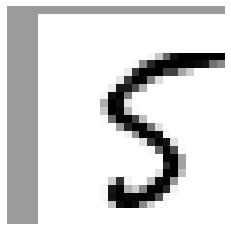

In [6]:
from scipy.ndimage.interpolation import shift

def show_image(array):
    plt.imshow(array.reshape(28,28), cmap='binary')
    plt.axis('off')
    plt.show()

def shift_image(array,dy,dx,new=0):
    ''' 
    cval : Value to fill past edges of input
    if mode is ‘constant’. Default is 0.0.
    '''
    return shift(array.reshape(28,28), [dy,dx], cval=new).reshape(784)


show_image(shift_image(x_train[912],1,4,new=100))

In [7]:
x_train.shape

(60000, 784)

In [8]:
x_train_expanded = [x_train] #list
y_train_expanded = [y_train]

for dx, dy in ( (1, 0), (-1, 0), (0, 1), (0, -1) ): 
    shifted_images = np.apply_along_axis(shift_image, axis=1, arr=x_train, dx=dx, dy=dy)
    x_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)

In [9]:
len(x_train_expanded) #original 1 and shift 4

5

In [10]:
x_train_expanded = np.concatenate(x_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)

x_train_expanded.shape, y_train_expanded.shape

((300000, 784), (300000,))

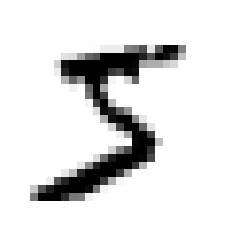

In [11]:
show_image(x_train_expanded[120000])

In [12]:
knn_clf.fit(x_train_expanded, y_train_expanded)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [13]:
y_knn_expanded_pred = knn_clf.predict(x_test)
y_knn_expanded_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [14]:
y_knn_expanded_pred_score = accuracy_score(y_test, y_knn_expanded_pred)
y_knn_expanded_pred_score

0.9763

> add more of *Interpolation* image can increase accuracy

[[0.24579675 0.         0.         0.         0.         0.
  0.         0.         0.         0.75420325]]


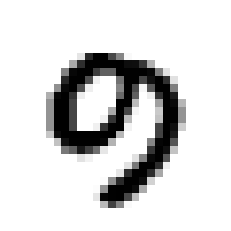

In [15]:
print(knn_clf.predict_proba([x_test[2589]]))
show_image(x_test[2589])

## KNN with over 97% Accuracy
* GridSearchCV

with original Data 60000 images

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'weights': ["uniform", "distance"], 
    'n_neighbors': [4]}
]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=3, verbose=3)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3] END ....n_neighbors=4, weights=uniform;, score=0.966 total time=  39.8s
[CV 2/3] END ....n_neighbors=4, weights=uniform;, score=0.966 total time=  32.1s
[CV 3/3] END ....n_neighbors=4, weights=uniform;, score=0.967 total time=  44.8s
[CV 1/3] END ...n_neighbors=4, weights=distance;, score=0.971 total time=  41.8s
[CV 2/3] END ...n_neighbors=4, weights=distance;, score=0.970 total time=  42.4s
[CV 3/3] END ...n_neighbors=4, weights=distance;, score=0.970 total time=  42.6s


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [4],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [17]:
grid_search.best_params_, grid_search.best_score_

({'n_neighbors': 4, 'weights': 'distance'}, 0.9703500000000002)

In [18]:
knn_clf_best = KNeighborsClassifier(4,weights='distance')
knn_clf_best.fit(x_train, y_train)
y_pred = knn_clf_best.predict(x_test)
scores = accuracy_score(y_test, y_pred)
scores

0.9714

using Data Augmentation: increase images

In [19]:
def shift_image(array, dx, dy):
    image = array.reshape(28,28)
    shifted = shift(image, [dy,dx], cval=0, mode='constant')
    return shifted.reshape(-1)

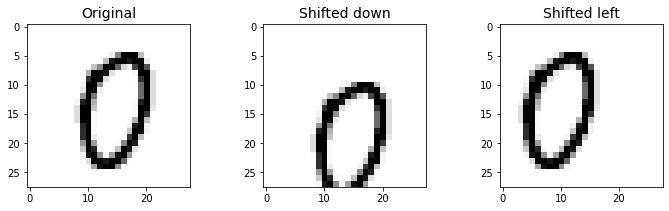

In [20]:
image = x_train[1000]
shift_image_down = shift_image(image,0,5)
shift_image_left = shift_image(image,-5,0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), cmap="Greys")

plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shift_image_down.reshape(28, 28), cmap="Greys")

plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shift_image_left.reshape(28, 28), cmap="Greys")
plt.show()

In [21]:
x_train_aug = [image for image in x_train]
y_train_aug = [label for label in y_train]

for dx, dy in ( (1, 0), (-1, 0), (0, 1), (0, -1) ):
    for image, label in zip(x_train, y_train):
        x_train_aug.append(shift_image(image,dx,dy))
        y_train_aug.append(label)

x_train_aug = np.array(x_train_aug)
y_train_aug = np.array(y_train_aug)

In [22]:
x_train_aug.shape

(300000, 784)

shuffle for don't want to loob the pattern of label

In [23]:
shuffle_idx = np.random.permutation(len(x_train_aug))
shuffle_idx

array([ 19420, 245564,  10363, ..., 257149,  84266, 296797])

In [24]:
x_train_aug = x_train_aug[shuffle_idx]
y_train_aug = y_train_aug[shuffle_idx]

In [25]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)
knn_clf.fit(x_train_aug, y_train_aug)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [26]:
y_pred_aug = knn_clf.predict(x_test)
score = accuracy_score(y_test, y_pred_aug)
score

0.9763

## Tackle the Titanic dataset

The goal is to predict whether or not a passenger survived based: attributes such as their age, sex, passenger class, where they embarked and so on.


In [27]:
import os
import urllib.request

TITANIC_PATH = os.path.join('datasets','titanic')
DOWNLOAD_URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/titanic/"

def fetch_data(url,path):
    if not os.path.isdir(path):
        os.makedirs(path)
    for filename in ('train.csv','test.csv'):
        filepath = os.path.join(path,filename)
        if not os.path.isfile(filepath):
            print(f'Downloading... {filename}')
            urllib.request.urlretrieve(f'{url}{filename}',filepath)

In [28]:
fetch_data(DOWNLOAD_URL,TITANIC_PATH)

In [29]:
import pandas as pd

def load_data(filename, path=TITANIC_PATH):
    csv_path = os.path.join(path,filename)
    return pd.read_csv(csv_path)

In [30]:
train_data = load_data('train.csv')
test_data = load_data('test.csv')

In [31]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [32]:
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


> this data has train set and test set but on test set don't have label *Survived* then we will make predictions

* PassengerId: a unique identifier for each passenger
* Survived: that's the target, 0 means the passenger did not  survive, while 1 means he/she survived.
* Pclass: passenger class.
* Name, Sex, Age: self-explanatory
* SibSp: how many siblings & spouses of the passenger aboard the Titanic.
* Parch: how many children & parents of the passenger aboard the Titanic.
* Ticket: ticket id
* Fare: price paid (in pounds)
* Cabin: passenger's cabin number
* Embarked: where the passenger embarked the Titanic

let's chang index to PassengerID

In [33]:
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

In [34]:
train_data.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


see how much data missing

In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


> age, cabin and little of embarked missing

* we will ignore the Cabin for now because many of them are null
* the age we will decide what to do with null -> replace with the median age seems reasonable
* the Name and Ticket may have some value, we will ignore the for now


In [36]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


let's take a quick look at all the categorical attributes:

In [37]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [38]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [39]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [40]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Now build our preprocessing pipelines
* numerical pipeline
* categorical pipeline

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer # missing value (null)
from sklearn.preprocessing import StandardScaler 
# StandardScaler: used to resize the distribution of values ​​so that the mean of the observed values ​​is 0 and the standard deviation is 1. 

numeric_pipe = Pipeline([
    ( 'imputer',SimpleImputer(strategy='median') ),
    ( 'scaler', StandardScaler() )
])

In [42]:
from sklearn.preprocessing import OneHotEncoder

categoric_pipe = Pipeline([ 
    ( 'imputer',SimpleImputer(strategy='most_frequent') ),
    ( 'encoder', OneHotEncoder(sparse=False)) # dense array
])

Combine(compose) pipeline

In [43]:
from sklearn.compose import ColumnTransformer

num_attr = ["Age", "SibSp", "Parch", "Fare"]
cat_attr = ["Pclass", "Sex", "Embarked"]

preprocess_pipe = ColumnTransformer([ 
    ( 'num', numeric_pipe, num_attr ),
    ( 'cat', categoric_pipe, cat_attr )
])

In [44]:
x_train = preprocess_pipe.fit_transform(
    train_data[num_attr + cat_attr]
)

x_test = preprocess_pipe.fit_transform(
    test_data[num_attr + cat_attr]
)

x_train[0]

array([-0.56573582,  0.43279337, -0.47367361, -0.50244517,  0.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ])

In [45]:
y_train = train_data['Survived']
y_train = np.array(y_train)
y_train[0]

0

We are now ready to train a classifier. Let's start with a *RandomForestClassifier*

In [46]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100,random_state=42)
forest_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
y_pred = forest_clf.predict(x_test)
y_pred[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1],
      dtype=int64)

see the prediction score 

In [48]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, x_train, y_train, cv=10)
forest_scores.mean()

0.8137578027465668

try support vector classifier (SCV)

In [49]:
from sklearn.svm import SVC

svm_clf = SVC(gamma='auto')
svm_scores = cross_val_score(svm_clf, x_train, y_train, cv=10)
svm_scores.mean()

0.8249313358302123

>gamma{‘scale’, ‘auto’} or float, default=’scale’
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
>* if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
>* if ‘auto’, uses 1 / n_features.

boxplot() function detects outliers (called "fliers") and does not include them within the whiskers.

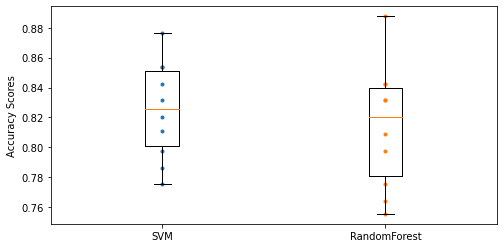

In [50]:
plt.figure(figsize=(8,4))
plt.plot([1]*10, svm_scores, '.') # x = 1, y = svm_scores
plt.plot([2]*10, forest_scores, '.')
plt.boxplot([svm_scores, forest_scores], labels=('SVM','RandomForest'))
plt.ylabel('Accuracy Scores',fontsize=10)
plt.show()

> The random forest classifier got a very high score on one of the 10 folds, but overall it had a lower mean score, as well as a bigger spread, so it looks like the SVM classifier is more likely to generalize well.

Do more feature engineering, for example:
* Seperate Age by group
* Replace SibSp and Parch with their sum.

In [51]:
train_data['Age'] // 15 

PassengerId
1      1.0
2      2.0
3      1.0
4      2.0
5      2.0
      ... 
887    1.0
888    1.0
889    NaN
890    1.0
891    2.0
Name: Age, Length: 891, dtype: float64

In [52]:
train_data['Age'] // 15*15

PassengerId
1      15.0
2      30.0
3      15.0
4      30.0
5      30.0
       ... 
887    15.0
888    15.0
889     NaN
890    15.0
891    30.0
Name: Age, Length: 891, dtype: float64

In [53]:
train_data['AgeBucket'] = train_data['Age'] // 15 * 15
train_data[['AgeBucket','Survived']].groupby(['AgeBucket']).mean()

,Survived
AgeBucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [54]:
train_data['RelativesOnboard'] = train_data['SibSp'] + train_data['Parch']
train_data[['RelativesOnboard','Survived']].groupby(['RelativesOnboard']).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [55]:
test_data['AgeBucket'] = test_data['Age'] // 15 * 15
test_data['RelativesOnboard'] = test_data['SibSp'] + test_data['Parch']

In [56]:
train_data.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBucket,RelativesOnboard
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,15.0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30.0,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,15.0,0


In [57]:
test_data.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBucket,RelativesOnboard
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,30.0,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,45.0,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,60.0,0


In [58]:
y_train = train_data.pop('Survived')

In [59]:
x_train = train_data[['Pclass','Sex','Fare','Embarked','AgeBucket','RelativesOnboard']]
x_test = test_data[['Pclass','Sex','Fare','Embarked','AgeBucket','RelativesOnboard']]

In [60]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            891 non-null    int64  
 1   Sex               891 non-null    object 
 2   Fare              891 non-null    float64
 3   Embarked          889 non-null    object 
 4   AgeBucket         714 non-null    float64
 5   RelativesOnboard  891 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 48.7+ KB


In [61]:
num_attr = ["Fare"]
cat_attr = ["Pclass", "Sex", "Embarked",'AgeBucket','RelativesOnboard']

preprocess_pipe = ColumnTransformer([ 
    ( 'num', numeric_pipe, num_attr ),
    ( 'cat', categoric_pipe, cat_attr )
])

x_train = preprocess_pipe.fit_transform(
    x_train[num_attr + cat_attr]
)

x_test = preprocess_pipe.fit_transform(
    x_test[num_attr + cat_attr]
)

y_train = np.array(y_train)

In [62]:
x_train[0]

array([-0.50244517,  0.        ,  0.        ,  1.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [63]:
param_grid = [
    {'n_estimators': [10,20,30,40,50,60,70,80,90,100]}
]

forest_clf = RandomForestClassifier(random_state=33)
grid_search = GridSearchCV(forest_clf, param_grid, cv=3, verbose=0)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=33),
             param_grid=[{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                           100]}])

In [64]:
grid_search.best_score_

0.7946127946127945

In [65]:
param_grid = [
    {'C': [1, 10, 100, 1000],
    'gamma': ['auto','scale'],
    'kernel': ['rbf','linear']}
]
svm_clf = SVC()
grid_search = GridSearchCV(svm_clf, param_grid, cv=3, verbose=0)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': ['auto', 'scale'],
                          'kernel': ['rbf', 'linear']}])

In [66]:
grid_search.best_score_

0.8294051627384961

In [67]:
svm_clf = SVC(**grid_search.best_params_)
svm_clf.fit(x_train, y_train)

SVC(C=10, gamma='auto')

In [68]:
score = cross_val_score(svm_clf,x_train, y_train, cv=3)
score.mean()

0.8294051627384961

In [69]:
y_pred = svm_clf.predict(x_train)
y_pred[:20]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [70]:
y_train[:20] == y_pred[:20]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True])

In [71]:
prediction = svm_clf.predict(x_test)
prediction[:20]

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1],
      dtype=int64)

In [72]:
test_data['Survived'] = prediction
test_data.sample(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBucket,RelativesOnboard,Survived
PassengerId,,,,,,,,,,,,,
1156,2,"Portaluppi, Mr. Emilio Ilario Giuseppe",male,30.0,0,0,C.A. 34644,12.7375,NaN,C,30.0,0,0
1091,3,"Rasmussen, Mrs. (Lena Jacobsen Solvang)",female,NaN,0,0,65305,8.1125,NaN,S,NaN,0,1
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,15.0,0,0
1175,3,"Touma, Miss. Maria Youssef",female,9.0,1,1,2650,15.2458,NaN,C,0.0,2,1
1059,3,"Ford, Mr. Edward Watson",male,18.0,2,2,W./C. 6608,34.3750,NaN,S,15.0,4,0
